# Market Response
This notebook tries to see how global markets respond to local shortages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import remove_f_years, yearly_trade, yearly_trade_by_country

## Loading the datasets
Loads the datasets into panda dataframes

In [2]:
df_trade_matrix = pd.read_csv('../data/Trade_DetailedTradeMatrix_E_All_Data.csv', encoding = 'ISO-8859-1')

/Users/Niels/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Swiss fruit shortage of 2012

In [3]:
df_clean = remove_f_years(df_trade_matrix)
df_clean.head()

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1986,Y1987,Y1988,Y1989,Y1990,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,Afghanistan,Algeria,"Cashew nuts, shelled",Export Quantity,tonnes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1,Afghanistan,Algeria,"Cashew nuts, shelled",Export Value,1000 US$,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN
2,Afghanistan,Algeria,Crude materials,Export Value,1000 US$,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0
3,Afghanistan,Algeria,Raisins,Export Quantity,tonnes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
4,Afghanistan,Algeria,Raisins,Export Value,1000 US$,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN


In [8]:
df_clean[df_clean['Item'] == 'Apricots'].head()

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1986,Y1987,Y1988,Y1989,Y1990,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
27,Afghanistan,Australia,Apricots,Export Quantity,tonnes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
28,Afghanistan,Australia,Apricots,Export Value,1000 US$,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
153,Afghanistan,Bahrain,Apricots,Export Quantity,tonnes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,23.0,7.0,NaN
154,Afghanistan,Bahrain,Apricots,Export Value,1000 US$,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39.0,59.0,18.0,NaN
531,Afghanistan,Canada,Apricots,Export Quantity,tonnes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN


### Fruit: Apricot

In [9]:
item = 'Apricots'

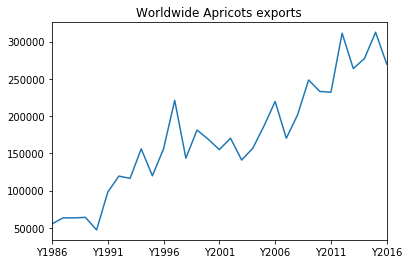

In [10]:
yearly_trade(df_clean, item, unit='tonnes')['Exports'].plot(title=f'Worldwide {item} exports')

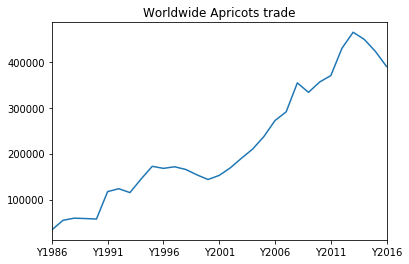

In [11]:
yearly_trade(df_clean, item, unit='1000 US$')['Exports'].plot(title=f'Worldwide {item} trade')

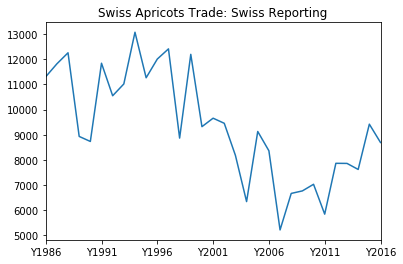

In [17]:
yearly_trade_by_country(df_clean, 'Switzerland', item, unit='tonnes', reporter=True\
                       )['Imports'].plot(title=f'Swiss {item} Trade: Swiss Reporting')

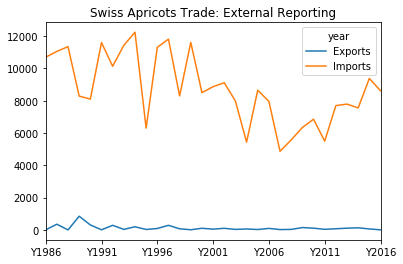

In [16]:
yearly_trade_by_country(df_clean, 'Switzerland', item, unit='tonnes', reporter=False\
                       ).plot(title=f'Swiss {item} Trade: External Reporting')

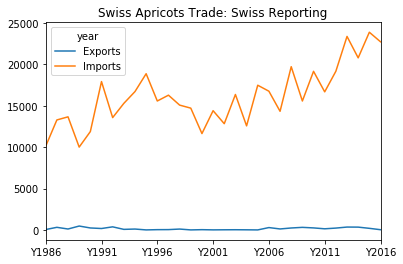

In [15]:
yearly_trade_by_country(df_clean, 'Switzerland', item, unit='1000 US$', reporter=True\
                       ).plot(title=f'Swiss {item} Trade: Swiss Reporting')